Task #2 : Prediction using unsupervised ML: KMeans Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import datasets
import sklearn.metrics as sm
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
features = df[df.columns[0:4]]
features.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
99,5.7,2.8,4.1,1.3
55,5.7,2.8,4.5,1.3
92,5.8,2.6,4.0,1.2
39,5.1,3.4,1.5,0.2
132,6.4,2.8,5.6,2.2
105,7.6,3.0,6.6,2.1
14,5.8,4.0,1.2,0.2
79,5.7,2.6,3.5,1.0
17,5.1,3.5,1.4,0.3
56,6.3,3.3,4.7,1.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.shape


(150, 4)

In [ ]:
df.size


600

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaled_features = MinMaxScaler().fit_transform(features[df.columns[0:6]])
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]


array([[-0.63070293,  0.10757791],
       [-0.62290494, -0.10425983],
       [-0.6695204 , -0.05141706],
       [-0.65415276, -0.10288487],
       [-0.64878806,  0.13348758],
       [-0.53527278,  0.28961572],
       [-0.65653779,  0.01072449],
       [-0.6257805 ,  0.05713354],
       [-0.6756435 , -0.20070328],
       [-0.64564462, -0.06720801]])

# Finding the optimum number of clusters for k-means classification

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


# Plotting the results onto a line grap
# Allowing us to observe 'The elbow'

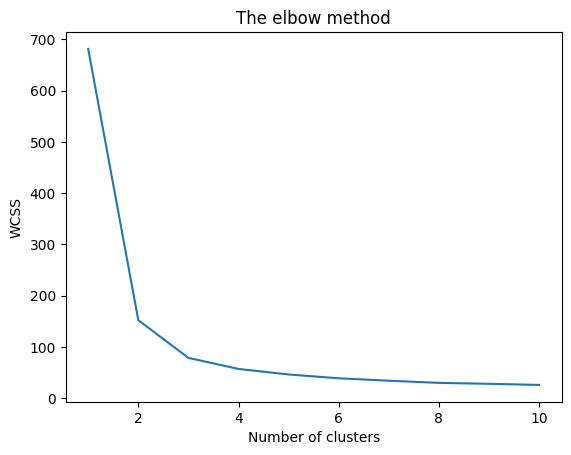

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

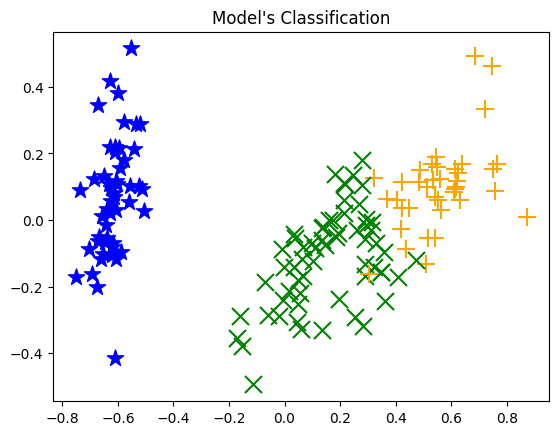

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
       plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=150)
    plt.title("Model's Classification")
    plt.show()
plot_clusters(features_2d, km_clusters)